In [1]:
import requests

# PySpark API:
#http://spark.apache.org/docs/latest/api/python/index.html

import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("appName")
sc = SparkContext(conf=conf)

# define SQLContext
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [2]:
import os
import sys

os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when
#from graphframes import *


spark = SparkSession.builder.appName("accident").config("spark.jars.packages", "graphframes:graphframes:0.6.0-spark2.3-s_2.11").enableHiveSupport().getOrCreate()

sqlContext = SQLContext(spark)



In [3]:
# Import libraries and other functions
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt
import gmplot
import pandas as pd
import numpy as np

#create an instance of SQLContext
sqlContext = SQLContext(spark)

# Create "accident" and "vehicle" Dataframe


In [4]:
#create a DataFrame directly from Accidents2020 csv file 

accidents_2020DF = spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").csv("hdfs:///user/imat5322_1396023/*accident-2020.csv")


In [5]:
accidents_2020DF.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- police_force: integer (nullable = true)
 |-- accident_severity: integer (nullable = true)
 |-- number_of_vehicles: integer (nullable = true)
 |-- number_of_casualties: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- local_authority_district: integer (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- first_road_class: integer (nullable = true)
 |-- first_road_number: integer (nullable = true)
 |-- road_type: integer (nullable = true)
 |-- speed_limit: integer (nullable =

In [6]:
#create a DataFrame directly from Vehicle2020 csv file 

vehicle_2020DF = spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").csv("hdfs:///user/imat5322_1396023/*vehicle-2020.csv")

In [7]:
vehicle_2020DF.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- vehicle_reference: integer (nullable = true)
 |-- vehicle_type: integer (nullable = true)
 |-- towing_and_articulation: integer (nullable = true)
 |-- vehicle_manoeuvre: integer (nullable = true)
 |-- vehicle_direction_from: integer (nullable = true)
 |-- vehicle_direction_to: integer (nullable = true)
 |-- vehicle_location_restricted_lane: integer (nullable = true)
 |-- junction_location: integer (nullable = true)
 |-- skidding_and_overturning: integer (nullable = true)
 |-- hit_object_in_carriageway: integer (nullable = true)
 |-- vehicle_leaving_carriageway: integer (nullable = true)
 |-- hit_object_off_carriageway: integer (nullable = true)
 |-- first_point_of_impact: integer (nullable = true)
 |-- vehicle_left_hand_drive: integer (nullable = true)
 |-- journey_purpose_of_driver: integer (nullable = true)
 |-- sex_of_driver: integer

In [8]:
#call action
accidents_2020DF.take(1)

[Row(accident_index='2.02001E+12', accident_year=2020, accident_reference='10219808', location_easting_osgr='521389', location_northing_osgr='175144', longitude='-0.254001', latitude='51.462262', police_force=1, accident_severity=3, number_of_vehicles=1, number_of_casualties=1, date='04/02/2020', day_of_week=3, time='09:00', local_authority_district=10, local_authority_ons_district='E09000032', local_authority_highway='E09000032', first_road_class=6, first_road_number=0, road_type=6, speed_limit=20, junction_detail=0, junction_control=-1, second_road_class=0, second_road_number=-1, pedestrian_crossing_human_control=9, pedestrian_crossing_physical_facilities=9, light_conditions=1, weather_conditions=9, road_surface_conditions=9, special_conditions_at_site=0, carriageway_hazards=0, urban_or_rural_area=1, did_police_officer_attend_scene_of_accident=3, trunk_road_flag=2, lsoa_of_accident_location='E01004576')]

In [9]:
#callaction
vehicle_2020DF.take(1)

[Row(accident_index='2020010219808', accident_year=2020, accident_reference='010219808', vehicle_reference=1, vehicle_type=9, towing_and_articulation=9, vehicle_manoeuvre=5, vehicle_direction_from=1, vehicle_direction_to=5, vehicle_location_restricted_lane=0, junction_location=0, skidding_and_overturning=0, hit_object_in_carriageway=0, vehicle_leaving_carriageway=0, hit_object_off_carriageway=0, first_point_of_impact=4, vehicle_left_hand_drive=9, journey_purpose_of_driver=6, sex_of_driver=2, age_of_driver=32, age_band_of_driver=6, engine_capacity_cc=1968, propulsion_code=2, age_of_vehicle=6, generic_make_model='AUDI Q5', driver_imd_decile=4, driver_home_area_type=1)]

In [10]:
#Call action
accidents_2020DF.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week| time|local_authority_district|local_authority_ons_district|local_authority_highway|f

In [11]:
#call action
vehicle_2020DF.show()

+--------------+-------------+------------------+-----------------+------------+-----------------------+-----------------+----------------------+--------------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+---------------------+-----------------------+-------------------------+-------------+-------------+------------------+------------------+---------------+--------------+------------------+-----------------+---------------------+
|accident_index|accident_year|accident_reference|vehicle_reference|vehicle_type|towing_and_articulation|vehicle_manoeuvre|vehicle_direction_from|vehicle_direction_to|vehicle_location_restricted_lane|junction_location|skidding_and_overturning|hit_object_in_carriageway|vehicle_leaving_carriageway|hit_object_off_carriageway|first_point_of_impact|vehicle_left_hand_drive|journey_purpose_of_driver|sex_of_driver|age_of_driver|age_band_of_driver|engine

# Joined Accident and Vehicle dataset


In [12]:
#Join accident and vehicle dataset 2020 
combined_df = accidents_2020DF.join(vehicle_2020DF, accidents_2020DF.accident_index == vehicle_2020DF.accident_index)

In [13]:
combined_df.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- police_force: integer (nullable = true)
 |-- accident_severity: integer (nullable = true)
 |-- number_of_vehicles: integer (nullable = true)
 |-- number_of_casualties: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- local_authority_district: integer (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- first_road_class: integer (nullable = true)
 |-- first_road_number: integer (nullable = true)
 |-- road_type: integer (nullable = true)
 |-- speed_limit: integer (nullable =

In [14]:
combined_df.take(1)

[Row(accident_index='2020010228951', accident_year=2020, accident_reference='010228951', location_easting_osgr='526921', location_northing_osgr='175757', longitude='-0.174191', latitude='51.466559', police_force=1, accident_severity=3, number_of_vehicles=2, number_of_casualties=1, date='07/01/2020', day_of_week=3, time='13:00', local_authority_district=10, local_authority_ons_district='E09000032', local_authority_highway='E09000032', first_road_class=6, first_road_number=0, road_type=9, speed_limit=20, junction_detail=0, junction_control=-1, second_road_class=0, second_road_number=-1, pedestrian_crossing_human_control=9, pedestrian_crossing_physical_facilities=0, light_conditions=1, weather_conditions=1, road_surface_conditions=1, special_conditions_at_site=0, carriageway_hazards=0, urban_or_rural_area=1, did_police_officer_attend_scene_of_accident=3, trunk_road_flag=2, lsoa_of_accident_location='E01004535', accident_index='2020010228951', accident_year=2020, accident_reference='010228

# Renaming numbers to meaninful words


In [15]:
#changing value labels from numbers to meaningful words using regexp_replace

combined_df = combined_df.withColumn('day_of_week', regexp_replace('day_of_week', '1', 'Sunday'))\
.withColumn('day_of_week', regexp_replace('day_of_week', '2', 'Monday'))\
.withColumn('day_of_week', regexp_replace('day_of_week', '3', 'Tuesday'))\
.withColumn('day_of_week', regexp_replace('day_of_week', '4', 'Wednesday'))\
.withColumn('day_of_week', regexp_replace('day_of_week', '5', 'Thursday'))\
.withColumn('day_of_week', regexp_replace('day_of_week', '6', 'Friday'))\
.withColumn('day_of_week', regexp_replace('day_of_week', '7', 'Saturday'))\
.withColumn('road_type', when(combined_df.road_type == "1", regexp_replace(combined_df.\
road_type, "1", "Roundabout")).\
when(combined_df.road_type == "2", regexp_replace(combined_df.\
road_type, "2", "One way street")).\
when(combined_df.road_type == "3", regexp_replace(combined_df.\
road_type, "3", "Dual carriageway")).\
when(combined_df.road_type == "6", regexp_replace(combined_df.\
road_type, "6", "Single carriageway")).\
when(combined_df.road_type == "7", regexp_replace(combined_df.\
road_type, "7", "Slip road")).\
when(combined_df.road_type == "9", regexp_replace(combined_df.\
road_type, "9", "Unknown")).\
when(combined_df.road_type == "12", regexp_replace(combined_df.\
road_type, "12", "One way street/Slip road")).\
when(combined_df.road_type == "-1", regexp_replace(combined_df.\
road_type, "-1", "Data missing or out of range")).otherwise(combined_df.road_type))\
.withColumn('light_conditions', when(combined_df.light_conditions == "1", regexp_replace(combined_df.\
light_conditions, "1", "Daylight")).\
when(combined_df.light_conditions == "4", regexp_replace(combined_df.\
light_conditions, "4", "Darkness - lights lit")).\
when(combined_df.light_conditions == "5", regexp_replace(combined_df.\
light_conditions, "5", "Darkness - lights unlit")).\
when(combined_df.light_conditions == "6", regexp_replace(combined_df.\
light_conditions, "6", "Darkness - no lighting")).\
when(combined_df.light_conditions == "7", regexp_replace(combined_df.\
light_conditions, "7", "Darkness - lighting unknown")).\
when(combined_df.light_conditions == "-1", regexp_replace(combined_df.\
light_conditions, "-1", "Data missing or out of range")).otherwise(combined_df.light_conditions))\
.withColumn('weather_conditions', when(combined_df.weather_conditions == "1", regexp_replace(combined_df.\
weather_conditions, "1", "Fine no high winds")).\
when(combined_df.weather_conditions == "2", regexp_replace(combined_df.\
weather_conditions, "2", "Raining no high winds")).\
when(combined_df.weather_conditions == "3", regexp_replace(combined_df.\
weather_conditions, "3", "Snowing no high winds")).\
when(combined_df.weather_conditions == "4", regexp_replace(combined_df.\
weather_conditions, "4", "Fine + high winds")).\
when(combined_df.weather_conditions == "5", regexp_replace(combined_df.\
weather_conditions, "5", "Raining + high winds")).\
when(combined_df.weather_conditions == "6", regexp_replace(combined_df.\
weather_conditions, "6", "Snowing + high winds")).\
when(combined_df.weather_conditions == "7", regexp_replace(combined_df.\
weather_conditions, "7", "Fog or mist")).\
when(combined_df.weather_conditions == "8", regexp_replace(combined_df.\
weather_conditions, "8", "Other")).\
when(combined_df.weather_conditions == "9", regexp_replace(combined_df.\
weather_conditions, "9", "Unknown")).\
when(combined_df.weather_conditions == "-1", regexp_replace(combined_df.\
weather_conditions, "-1", "Data missing or out of range")).otherwise(combined_df.weather_conditions))\
.withColumn('road_surface_conditions', when(combined_df.road_surface_conditions == "1", regexp_replace(combined_df.\
road_surface_conditions, "1", "Dry")).\
when(combined_df.road_surface_conditions == "2", regexp_replace(combined_df.\
road_surface_conditions, "2", "Wet or damp")).\
when(combined_df.road_surface_conditions == "3", regexp_replace(combined_df.\
road_surface_conditions, "3", "Snow")).\
when(combined_df.road_surface_conditions == "4", regexp_replace(combined_df.\
road_surface_conditions, "4", "Frost or ice")).\
when(combined_df.road_surface_conditions == "5", regexp_replace(combined_df.\
road_surface_conditions, "5", "Flood over 3cm. deep")).\
when(combined_df.road_surface_conditions == "6", regexp_replace(combined_df.\
road_surface_conditions, "6", "Oil or diesel")).\
when(combined_df.road_surface_conditions == "7", regexp_replace(combined_df.\
road_surface_conditions, "7", "Mud")).\
when(combined_df.road_surface_conditions == "9", regexp_replace(combined_df.\
road_surface_conditions, "9", "unknown (self reported)")).\
when(combined_df.road_surface_conditions == "-1", regexp_replace(combined_df.\
road_surface_conditions, "-1", "Data missing or out of range")).otherwise(combined_df.road_surface_conditions))\
.withColumn('special_conditions_at_site', when(combined_df.special_conditions_at_site == "0", regexp_replace(combined_df.\
special_conditions_at_site, "0", "None")).\
when(combined_df.special_conditions_at_site == "1", regexp_replace(combined_df.\
special_conditions_at_site, "1", "Auto traffic signal - out")).\
when(combined_df.special_conditions_at_site == "2", regexp_replace(combined_df.\
special_conditions_at_site, "2", "Auto signal part defective")).\
when(combined_df.special_conditions_at_site == "3", regexp_replace(combined_df.\
special_conditions_at_site, "3", "Road sign or marking defective or obscured")).\
when(combined_df.special_conditions_at_site == "4", regexp_replace(combined_df.\
special_conditions_at_site, "4", "Roadworks")).\
when(combined_df.special_conditions_at_site == "5", regexp_replace(combined_df.\
special_conditions_at_site, "5", "Road surface defective")).\
when(combined_df.special_conditions_at_site == "6", regexp_replace(combined_df.\
special_conditions_at_site, "6", "Oil or diesel")).\
when(combined_df.special_conditions_at_site == "7", regexp_replace(combined_df.\
special_conditions_at_site, "7", "Mud")).\
when(combined_df.special_conditions_at_site == "9", regexp_replace(combined_df.\
special_conditions_at_site, "9", "unknown (self reported)")).\
when(combined_df.special_conditions_at_site == "-1", regexp_replace(combined_df.\
special_conditions_at_site, "-1", "Data missing or out of range")).otherwise(combined_df.special_conditions_at_site))\
.withColumn('Accident_Severity', regexp_replace('Accident_Severity', '1', 'Fatal'))\
.withColumn('Accident_Severity', regexp_replace('Accident_Severity', '2', 'Serious'))\
.withColumn('Accident_Severity', regexp_replace('Accident_Severity', '3', 'Slight'))\
.withColumn('junction_control', when(combined_df.junction_control == "0", regexp_replace(combined_df.\
junction_control, "0", "Not at or within 20 metres of junction")).\
when(combined_df.junction_control == "1", regexp_replace(combined_df.\
junction_control, "1", "Approaching junction or waiting/parked at junction approach")).\
when(combined_df.junction_control == "2", regexp_replace(combined_df.\
junction_control, "2", "Cleared junction or waiting/parked at junction exit")).\
when(combined_df.junction_control == "3", regexp_replace(combined_df.\
junction_control, "3", "Leaving roundabout")).\
when(combined_df.junction_control == "4", regexp_replace(combined_df.\
junction_control, "4", "Entering roundabout")).\
when(combined_df.junction_control == "5", regexp_replace(combined_df.\
junction_control, "5", "Leaving main road")).\
when(combined_df.junction_control == "6", regexp_replace(combined_df.\
junction_control, "6", "Entering main road")).\
when(combined_df.junction_control == "7", regexp_replace(combined_df.\
junction_control, "7", "Entering from slip road")).\
when(combined_df.junction_control == "8", regexp_replace(combined_df.\
junction_control, "8", "Mid Junction - on roundabout or on main road")).\
when(combined_df.junction_control == "9", regexp_replace(combined_df.\
junction_control, "9", "unknown (self reported)")).\
when(combined_df.junction_control == "-1", regexp_replace(combined_df.\
junction_control, "-1", "Data missing or out of range")).otherwise(combined_df.junction_control))\
.withColumn('did_police_officer_attend_scene_of_accident', when(combined_df.did_police_officer_attend_scene_of_accident == "1", regexp_replace(combined_df.\
did_police_officer_attend_scene_of_accident, "1", "Yes")).\
when(combined_df.did_police_officer_attend_scene_of_accident == "2", regexp_replace(combined_df.\
did_police_officer_attend_scene_of_accident, "2", "No")).\
when(combined_df.did_police_officer_attend_scene_of_accident == "3", regexp_replace(combined_df.\
did_police_officer_attend_scene_of_accident, "3", "No - accident was reported (self rep only)")).\
when(combined_df.did_police_officer_attend_scene_of_accident == "-1", regexp_replace(combined_df.\
did_police_officer_attend_scene_of_accident, "-1", "Data missing or out of range")).otherwise(combined_df.did_police_officer_attend_scene_of_accident))\
.withColumn('urban_or_rural_area', when(combined_df.urban_or_rural_area == "1", regexp_replace(combined_df.\
urban_or_rural_area, "1", "Urban")).\
when(combined_df.urban_or_rural_area == "2", regexp_replace(combined_df.\
urban_or_rural_area, "2", "Rural")).\
when(combined_df.urban_or_rural_area == "3", regexp_replace(combined_df.\
urban_or_rural_area, "3", "Unallocated")).\
when(combined_df.urban_or_rural_area == "-1", regexp_replace(combined_df.\
urban_or_rural_area, "-1", "null")).otherwise(combined_df.urban_or_rural_area))


In [16]:
combined_df = combined_df.withColumn('sex_of_driver', when(combined_df.sex_of_driver == "1", regexp_replace(combined_df.\
sex_of_driver, "1", "Male")).\
when(combined_df.sex_of_driver == "2", regexp_replace(combined_df.\
sex_of_driver, "2", "Female")).\
when(combined_df.sex_of_driver == "3", regexp_replace(combined_df.\
sex_of_driver, "3", "Unknow")).\
when(combined_df.sex_of_driver == "-1", regexp_replace(combined_df.\
sex_of_driver, "-1", "Data missing or out of range")).otherwise(combined_df.sex_of_driver))


In [17]:
combined_df = combined_df.withColumn('age_band_of_driver', when(combined_df.age_band_of_driver == "1", regexp_replace(combined_df.\
age_band_of_driver, "1", "0-5")).\
when(combined_df.age_band_of_driver == "2", regexp_replace(combined_df.\
age_band_of_driver, "2", "6-10")).\
when(combined_df.age_band_of_driver == "3", regexp_replace(combined_df.\
age_band_of_driver, "3", "11-15")).\
when(combined_df.age_band_of_driver == "4", regexp_replace(combined_df.\
age_band_of_driver, "4", "16-20")).\
when(combined_df.age_band_of_driver == "5", regexp_replace(combined_df.\
age_band_of_driver, "5", "21-25")).\
when(combined_df.age_band_of_driver == "6", regexp_replace(combined_df.\
age_band_of_driver, "6", "26-35")).\
when(combined_df.age_band_of_driver == "7", regexp_replace(combined_df.\
age_band_of_driver, "7", "36-45")).\
when(combined_df.age_band_of_driver == "8", regexp_replace(combined_df.\
age_band_of_driver, "8", "46-55")).\
when(combined_df.age_band_of_driver == "9", regexp_replace(combined_df.\
age_band_of_driver, "9", "56-65")).\
when(combined_df.age_band_of_driver == "10", regexp_replace(combined_df.\
age_band_of_driver, "9", "56-65")).\
when(combined_df.age_band_of_driver == "11", regexp_replace(combined_df.\
age_band_of_driver, "9", "56-65")).\
when(combined_df.age_band_of_driver == "-1", regexp_replace(combined_df.\
age_band_of_driver, "-1", "Null")).otherwise(combined_df.age_band_of_driver))


In [18]:
#Show meaningful words for values day of week

combined_df.select("day_of_week").distinct().show()

+-----------+
|day_of_week|
+-----------+
|  Wednesday|
|    Tuesday|
|     Friday|
|   Thursday|
|   Saturday|
|     Monday|
|     Sunday|
+-----------+



In [19]:
#Show meaningful words for values sex of driver
combined_df.select("sex_of_driver").distinct().show()

+--------------------+
|       sex_of_driver|
+--------------------+
|              Female|
|                Male|
|Data missing or o...|
|              Unknow|
+--------------------+



In [20]:
#Show meaningful words for values day of Accident Severity
combined_df.select("Accident_Severity").distinct().show()

+-----------------+
|Accident_Severity|
+-----------------+
|           Slight|
|            Fatal|
|          Serious|
+-----------------+



#  Register the DataFrame as a Table

In [21]:
#Register dataframe as a table 
sqlContext.registerDataFrameAsTable(combined_df, "table_combined")

In [22]:
#call action
sqlContext.sql("select * from table_combined").show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+------------------------+----------------------------+-----------------------+----------------+-----------------+------------------+-----------+---------------+--------------------+-----------------+------------------+---------------------------------+---------------------------------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+--------------+-------------+------------------+-----------------+------------+-----------------------+-----------------+----------------------+--------------------+--------------------------------+-----------------+------------------------+-------------------------+--------

# Data Exploration

In [23]:
#Accident count across months
sqlContext.sql("SELECT substring(Date, 4, 2) \
as Month, count(*) as Count FROM table_combined GROUP BY substring (Date, 4, 2)").orderBy (asc('Count')).show()

+-----+-----+
|Month|Count|
+-----+-----+
|   04| 6647|
|   05|11401|
|   03|13176|
|   06|13745|
|   11|15420|
|   12|16172|
|   07|16807|
|   02|17060|
|   10|17848|
|   08|18113|
|   09|18855|
|   01|19120|
+-----+-----+



In [24]:
# Total count returned for Casualties per day of week
sqlContext.sql("select Day_of_Week, Number_of_Casualties, count(*) as Count from table_combined group \
by Day_of_Week, Number_of_Casualties").count()

70

In [25]:
# Casualties per day of week
day_of_week = sqlContext.sql("select Day_of_Week, Number_of_Casualties, count(*) as Count from table_combined group \
by Day_of_Week, Number_of_Casualties")

In [26]:
#Visual display day of week vs number of casualties
display(day_of_week)

DataFrame[Day_of_Week: string, Number_of_Casualties: int, Count: bigint]

In [27]:
# Accident count per day of week
dow = sqlContext.sql("select Day_of_Week,count(*)as Count from table_combined group by Day_of_Week")

In [28]:
dow.show()

+-----------+-----+
|Day_of_Week|Count|
+-----------+-----+
|  Wednesday|27572|
|    Tuesday|26890|
|     Friday|30077|
|   Thursday|28454|
|   Saturday|24845|
|     Monday|25864|
|     Sunday|20662|
+-----------+-----+



In [29]:
# Return distinct list of Speed Limits

sqlContext.sql("SELECT distinct Speed_Limit FROM table_combined").show()

+-----------+
|Speed_Limit|
+-----------+
|         -1|
|         20|
|         40|
|         50|
|         70|
|         60|
|         30|
+-----------+



In [30]:
# Return speed limit with number of casualties

sqlContext.sql("select Speed_Limit, Number_of_Casualties, count(*) as Count from table_combined group \
by Speed_Limit, Number_of_Casualties").show()

+-----------+--------------------+-----+
|Speed_Limit|Number_of_Casualties|Count|
+-----------+--------------------+-----+
|         40|                   6|   46|
|         70|                   2| 2319|
|         20|                   2| 1648|
|         50|                  10|    2|
|         60|                   3| 1534|
|         70|                   7|   33|
|         40|                   8|    6|
|         60|                  12|    2|
|         50|                   9|    4|
|         50|                   4|  229|
|         60|                  10|    5|
|         60|                   2| 4928|
|         20|                   3|  330|
|         40|                   9|    4|
|         30|                   9|   15|
|         70|                   5|  144|
|         40|                   5|  106|
|         60|                   5|  169|
|         40|                  17|    1|
|         60|                   1|14727|
+-----------+--------------------+-----+
only showing top

In [31]:
# Return speed limit cluster casaulties and accident severity

SL_CS = sqlContext.sql("select Speed_Limit, Number_of_Casualties, Accident_Severity, count(*) as Count from table_combined group \
by Speed_Limit, Number_of_Casualties, Accident_Severity")

# Data Analysis

In [32]:
#Visualisation Speed limit vs Accident severity/Number of Casualties
display(SL_CS)

DataFrame[Speed_Limit: int, Number_of_Casualties: int, Accident_Severity: string, Count: bigint]

In [33]:
#Accident count for Accident severity 
sqlContext.sql("SELECT Accident_Severity,COUNT(*) FROM table_combined GROUP BY Accident_Severity ORDER BY Accident_Severity").show()

+-----------------+--------+
|Accident_Severity|count(1)|
+-----------------+--------+
|            Fatal|    2768|
|          Serious|   34914|
|           Slight|  146682|
+-----------------+--------+



In [34]:
#Accident per date 
sqlContext.sql("SELECT Date, \
                        COUNT(*) \
                        FROM table_combined \
                        GROUP BY Date \
                        ORDER BY Date").show(30)

+----------+--------+
|      Date|count(1)|
+----------+--------+
|01/01/2020|     392|
|01/02/2020|     568|
|01/03/2020|     466|
|01/04/2020|     152|
|01/05/2020|     292|
|01/06/2020|     490|
|01/07/2020|     452|
|01/08/2020|     591|
|01/09/2020|     598|
|01/10/2020|     665|
|01/11/2020|     431|
|01/12/2020|     692|
|02/01/2020|     442|
|02/02/2020|     448|
|02/03/2020|     646|
|02/04/2020|     164|
|02/05/2020|     293|
|02/06/2020|     496|
|02/07/2020|     452|
|02/08/2020|     521|
|02/09/2020|     657|
|02/10/2020|     717|
|02/11/2020|     604|
|02/12/2020|     673|
|03/01/2020|     484|
|03/02/2020|     543|
|03/03/2020|     649|
|03/04/2020|     158|
|03/05/2020|     164|
|03/06/2020|     356|
+----------+--------+
only showing top 30 rows



In [35]:
#Accident count across months cluster with number of casualties
month = sqlContext.sql("SELECT substring(Date, 4, 2) \
as Month, number_of_casualties, count(*) as Count FROM table_combined GROUP BY substring (Date, 4, 2), number_of_casualties").orderBy (asc('Count')).show()

+-----+--------------------+-----+
|Month|number_of_casualties|Count|
+-----+--------------------+-----+
|   01|                  17|    1|
|   09|                  41|    1|
|   10|                   7|    2|
|   01|                   9|    2|
|   10|                   8|    2|
|   09|                  10|    2|
|   04|                   9|    2|
|   07|                  10|    2|
|   03|                  19|    2|
|   01|                  12|    2|
|   08|                  13|    2|
|   09|                  11|    3|
|   04|                   6|    3|
|   03|                  11|    4|
|   04|                   7|    4|
|   12|                   9|    4|
|   06|                  10|    5|
|   04|                   5|    5|
|   09|                   9|    5|
|   05|                   7|    6|
+-----+--------------------+-----+
only showing top 20 rows



# More data exploration

In [36]:
#Accident per weather conditions
sqlContext.sql("SELECT weather_conditions, count(*) as Count FROM table_combined GROUP BY weather_conditions").orderBy (desc('Count')).show()

+--------------------+------+
|  weather_conditions| Count|
+--------------------+------+
|  Fine no high winds|144663|
|Raining no high w...| 22765|
|               Other|  5162|
|             Unknown|  4455|
|Raining + high winds|  3098|
|   Fine + high winds|  2737|
|         Fog or mist|   977|
|Snowing no high w...|   366|
|Snowing + high winds|   140|
|Data missing or o...|     1|
+--------------------+------+



In [37]:
#Accident per weather conditions vs severity 
sqlContext.sql("SELECT weather_conditions, Accident_Severity, count(*) as Count FROM table_combined GROUP BY weather_conditions, Accident_Severity").orderBy (desc('Count')).show()


+--------------------+-----------------+------+
|  weather_conditions|Accident_Severity| Count|
+--------------------+-----------------+------+
|  Fine no high winds|           Slight|114281|
|  Fine no high winds|          Serious| 28115|
|Raining no high w...|           Slight| 18515|
|               Other|           Slight|  4358|
|Raining no high w...|          Serious|  3991|
|             Unknown|           Slight|  3932|
|Raining + high winds|           Slight|  2441|
|  Fine no high winds|            Fatal|  2267|
|   Fine + high winds|           Slight|  2037|
|               Other|          Serious|   756|
|         Fog or mist|           Slight|   729|
|   Fine + high winds|          Serious|   631|
|Raining + high winds|          Serious|   599|
|             Unknown|          Serious|   503|
|Snowing no high w...|           Slight|   284|
|Raining no high w...|            Fatal|   259|
|         Fog or mist|          Serious|   206|
|Snowing + high winds|           Slight|

In [38]:
#Accident per road type
sqlContext.sql("SELECT road_type, count(*) as Count FROM table_combined GROUP BY road_type").orderBy (desc('Count')).show()

+------------------+------+
|         road_type| Count|
+------------------+------+
|Single carriageway|134378|
|  Dual carriageway| 28061|
|        Roundabout| 11729|
|    One way street|  3641|
|           Unknown|  3595|
|         Slip road|  2960|
+------------------+------+



In [39]:
#Accident per road type
road_type = sqlContext.sql("SELECT road_type, Number_of_Casualties, count(*) as Count FROM table_combined GROUP BY road_type, Number_of_Casualties").orderBy (desc('Count')).show()

+------------------+--------------------+------+
|         road_type|Number_of_Casualties| Count|
+------------------+--------------------+------+
|Single carriageway|                   1|105606|
|Single carriageway|                   2| 20170|
|  Dual carriageway|                   1| 19967|
|        Roundabout|                   1| 10149|
|Single carriageway|                   3|  5664|
|  Dual carriageway|                   2|  5195|
|           Unknown|                   1|  3272|
|    One way street|                   1|  3240|
|         Slip road|                   1|  2247|
|Single carriageway|                   4|  1907|
|  Dual carriageway|                   3|  1776|
|        Roundabout|                   2|  1238|
|  Dual carriageway|                   4|   650|
|Single carriageway|                   5|   640|
|         Slip road|                   2|   480|
|    One way street|                   2|   300|
|  Dual carriageway|                   5|   265|
|           Unknown|

In [40]:
#Accident per road surface condition vs accident severity
sqlContext.sql("SELECT road_surface_conditions, Accident_Severity, count(*) as Count FROM table_combined GROUP BY road_surface_conditions,Accident_Severity").orderBy (desc('Count')).show()

+-----------------------+-----------------+------+
|road_surface_conditions|Accident_Severity| Count|
+-----------------------+-----------------+------+
|                    Dry|           Slight|101718|
|            Wet or damp|           Slight| 41469|
|                    Dry|          Serious| 24500|
|            Wet or damp|          Serious|  9852|
|                    Dry|            Fatal|  1851|
|   unknown (self rep...|           Slight|  1368|
|           Frost or ice|           Slight|  1003|
|            Wet or damp|            Fatal|   885|
|   Data missing or o...|           Slight|   634|
|           Frost or ice|          Serious|   279|
|                   Snow|           Slight|   259|
|   Flood over 3cm. deep|           Slight|   231|
|   unknown (self rep...|          Serious|   109|
|   Data missing or o...|          Serious|    79|
|   Flood over 3cm. deep|          Serious|    54|
|                   Snow|          Serious|    41|
|           Frost or ice|      

In [41]:
#Accident per road surface condition
sqlContext.sql("SELECT road_surface_conditions, count(*) as Count FROM table_combined GROUP BY road_surface_conditions").orderBy (desc('Count')).show()

+-----------------------+------+
|road_surface_conditions| Count|
+-----------------------+------+
|                    Dry|128069|
|            Wet or damp| 52206|
|   unknown (self rep...|  1477|
|           Frost or ice|  1303|
|   Data missing or o...|   718|
|                   Snow|   301|
|   Flood over 3cm. deep|   290|
+-----------------------+------+



In [42]:
#Accident and number of vehicles involve 
sqlContext.sql("SELECT number_of_vehicles, count(*) as Count FROM table_combined GROUP BY number_of_vehicles").orderBy (desc('Count')).show()

+------------------+------+
|number_of_vehicles| Count|
+------------------+------+
|                 2|126150|
|                 1| 28499|
|                 3| 20760|
|                 4|  5888|
|                 5|  1810|
|                 6|   648|
|                 7|   350|
|                 8|   144|
|                11|    33|
|                10|    30|
|                 9|    27|
|                13|    13|
|                12|    12|
+------------------+------+



In [43]:
#Accident and number of vehicles involve 
sqlContext.sql("SELECT age_band_of_driver, count(*) as Count FROM table_combined GROUP BY age_band_of_driver").orderBy (desc('Count')).show()

+------------------+-----+
|age_band_of_driver|Count|
+------------------+-----+
|             26-35|40525|
|             36-45|29778|
|             46-55|26391|
|              Null|25450|
|             21-25|18394|
|             56-65|17093|
|             16-20|12201|
|                10| 7693|
|                11| 4761|
|             11-15| 1701|
|              6-10|  340|
|               0-5|   37|
+------------------+-----+



# Some Visualisations

In [44]:
Accident_type = combined_df.groupby("Accident_Severity","Speed_limit").count().sort("count")


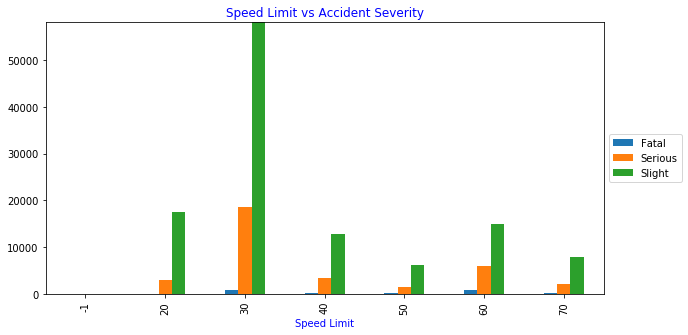

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

Panda_Accident_Type = Accident_type.toPandas()

%matplotlib inline

plot_Outcome=Panda_Accident_Type.pivot(index='Speed_limit', columns='Accident_Severity', values='count') \
                         .plot(kind='bar', figsize=(10,5))
plot_Outcome.set_title("Speed Limit vs Accident Severity",color="b")
plot_Outcome.set_ylim(0,58000)
plot_Outcome.set_xlabel("Speed Limit",color="b")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [46]:
# https://pixiedust.github.io/pixiedust/use.html

import pixiedust

Pixiedust database opened successfully



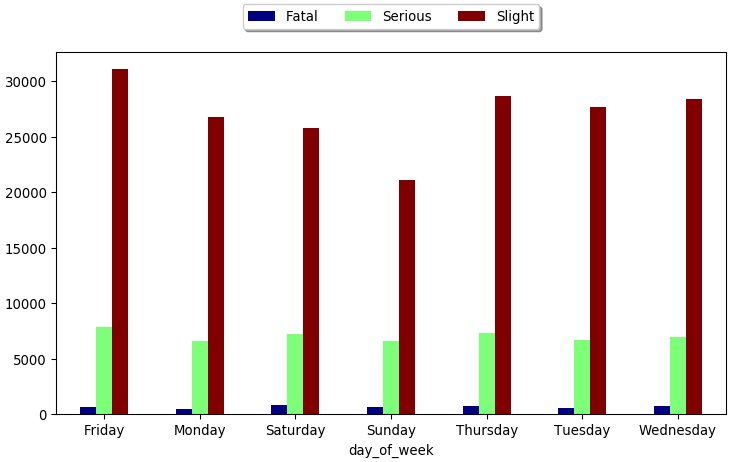

In [47]:
#Bar chart cluster visual day of week vs number of casualties/accident severity
display(combined_df)


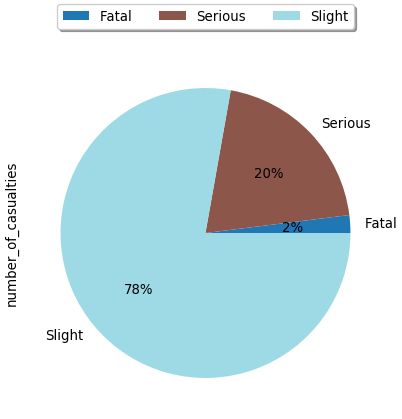

In [48]:
#piechart visual accident severity vs casualties
display(combined_df)


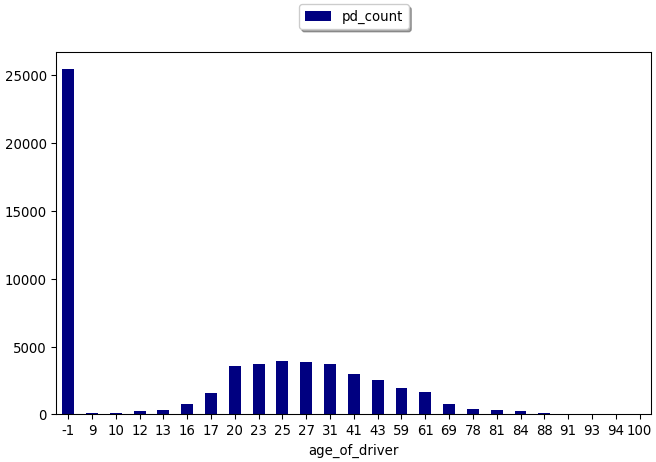

In [49]:
#Visual Sex of driver vs accident severity
display(combined_df)


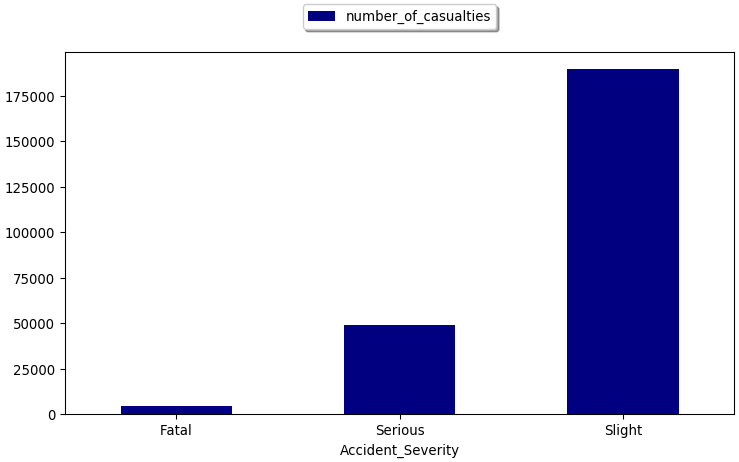

In [50]:
#Visual of accident severity vs number of casualties
display(combined_df)


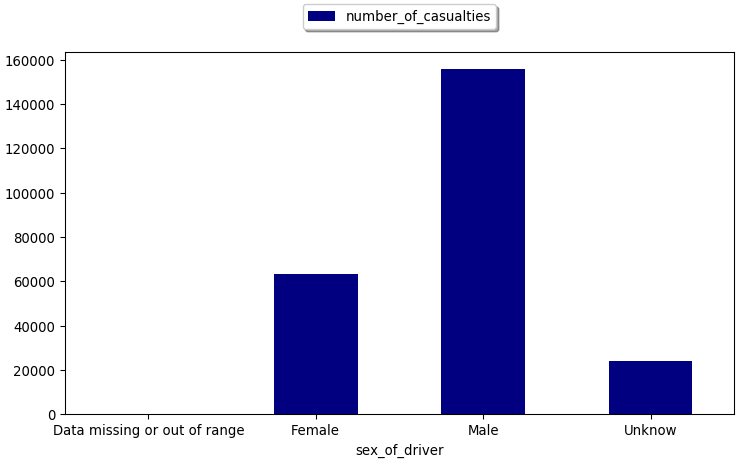

In [51]:
#Bar chart visual Sex of driver vs number of casualties 
display(combined_df)


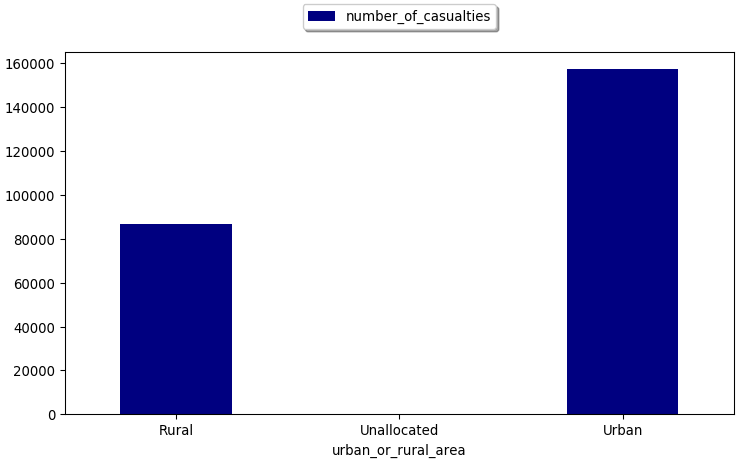

In [52]:
#Bar chart visual number of casualties in rural area vs urban area 
display(combined_df)

# Geographical analysis

In [53]:
#Accdient Geographical table for visualisation
accidentGeo = sqlContext.sql("select longitude, latitude, Date, Day_of_Week, road_surface_conditions, sex_of_driver, road_type, number_of_casualties,count(*) as Count from table_combined group \
by longitude, latitude, Date, Day_of_Week, road_surface_conditions, sex_of_driver, road_type, number_of_casualties").orderBy(desc('count'))

In [54]:
#Visual of accident casuality in the UK
display(accidentGeo)

In [55]:
#Visual highest casialty single carriage way road type
display(accidentGeo)